<a href="https://colab.research.google.com/github/virf96/Basico/blob/main/tree_bins.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import  sklearn.datasets  as ds
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split

In [2]:
X, y = ds.make_circles(n_samples = 1000,noise =0.1,factor=.7) 

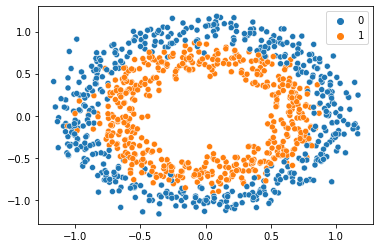

In [3]:
sns.scatterplot(x=X[:,0],y=X[:,1],hue=y)

In [4]:
data = pd.DataFrame(X,columns = ["feat_1","feat_2"])
data["target"] = y

In [5]:
X = data[["feat_1","feat_2"]].copy()
y = data["target"]

In [26]:
X

,feat_1,feat_2
0,-1.130554,-0.379146
1,-0.862931,-0.338628
2,-0.545081,-0.203222
3,0.332557,0.758735
4,-0.101700,0.630070
...,...,...
995,0.518068,0.703122
996,-0.792474,0.285280
997,0.168510,-0.959691
998,-0.134515,-0.558022


In [7]:
features = list(X.columns)


In [8]:
X_train, X_test, y_train, y_test = train_test_split(
...     X, y, test_size=0.33, random_state=42)

In [9]:
feat='feat_2'

In [10]:
tree_splitter = DecisionTreeClassifier(max_depth=11, min_samples_leaf=0.10, max_features=1)
X_to_split = X_train[[feat]]
tree_splitter.fit(X_to_split,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=11, max_features=1, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=0.1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

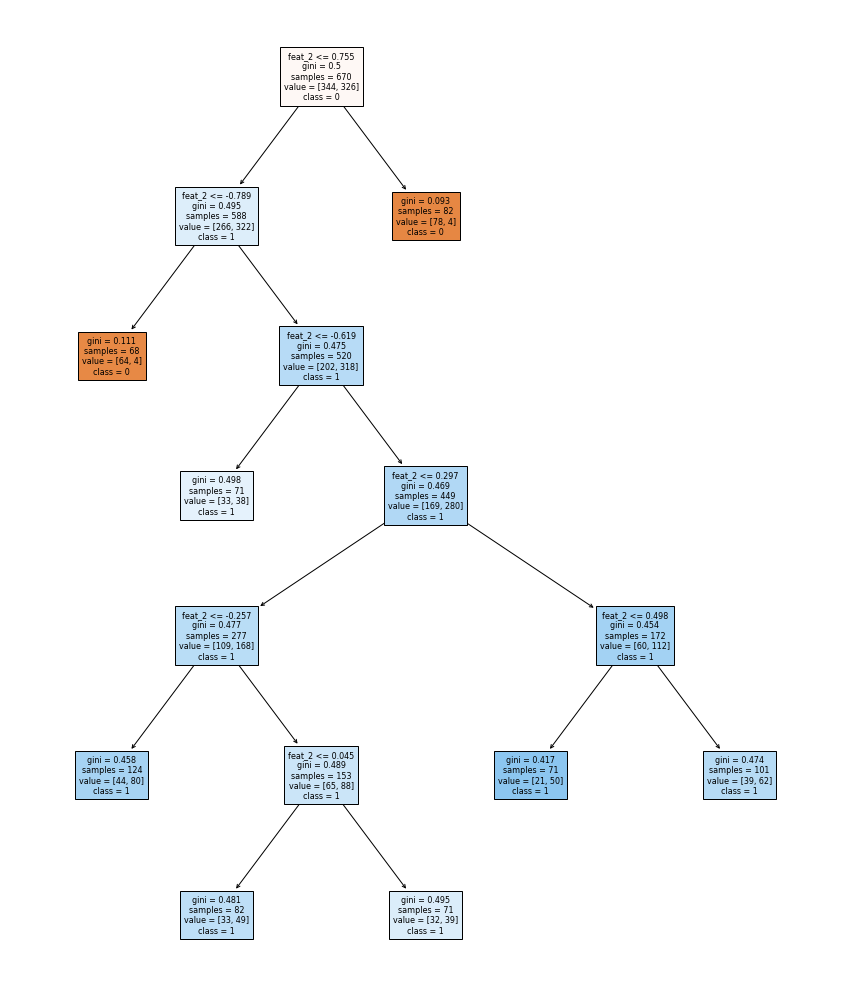

In [12]:
fig = plt.figure(figsize=(15,18))
_ = plot_tree(tree_splitter, 
                   feature_names=[feat],  
                   class_names=['0','1'],
                   filled=True,fontsize=8)

In [13]:
X_to_split[f"{feat}_node"] = tree_splitter.apply(X_to_split)

In [14]:
X_to_split

,feat_2,feat_2_node
703,-0.758467,4
311,1.052921,14
722,0.894874,14
629,-0.675675,4
0,-0.379146,7
...,...,...
106,-0.272351,7
270,0.023413,9
860,0.185331,10
435,-0.666103,4


In [29]:
X_to_split.feat_2_node.unique()

array([ 4, 14,  7, 12,  9, 13, 10,  2])

In [15]:
X_to_split[f"{feat}_node"].value_counts(1)

7     0.185075
13    0.150746
14    0.122388
9     0.122388
12    0.105970
10    0.105970
4     0.105970
2     0.101493
Name: feat_2_node, dtype: float64

In [16]:
X_to_split_bins =  X_to_split.groupby(f"{feat}_node")[feat].agg(["min","max"])

In [17]:
X_to_split_bins

,min,max
feat_2_node,,
2,-1.165358,-0.789175
4,-0.788427,-0.620564
7,-0.617272,-0.258435
9,-0.255781,0.044840
10,0.045271,0.295323
12,0.299443,0.498262
13,0.498689,0.754715
14,0.755832,1.166265


In [18]:
X_to_split_bins["interval"] =X_to_split_bins.apply(lambda x: pd.Interval(x["min"],x["max"]),axis=1)
dict_to_split_bins = X_to_split_bins["interval"].to_dict()

In [19]:
X_to_split_bins

,min,max,interval
feat_2_node,,,
2,-1.165358,-0.789175,"(-1.1653576329262503, -0.7891749505152746]"
4,-0.788427,-0.620564,"(-0.7884269163850195, -0.6205643503528318]"
7,-0.617272,-0.258435,"(-0.6172723590528151, -0.2584347563421086]"
9,-0.255781,0.044840,"(-0.25578081416856785, 0.04484003783749959]"
10,0.045271,0.295323,"(0.04527056497705474, 0.29532311244008547]"
12,0.299443,0.498262,"(0.29944255116397733, 0.4982619546323492]"
13,0.498689,0.754715,"(0.49868876585641697, 0.7547150522241399]"
14,0.755832,1.166265,"(0.7558322211407411, 1.1662654082182402]"


In [20]:
dict_to_split_bins

{2: Interval(-1.1653576329262503, -0.7891749505152746, closed='right'),
 4: Interval(-0.7884269163850195, -0.6205643503528318, closed='right'),
 7: Interval(-0.6172723590528151, -0.2584347563421086, closed='right'),
 9: Interval(-0.25578081416856785, 0.04484003783749959, closed='right'),
 10: Interval(0.04527056497705474, 0.29532311244008547, closed='right'),
 12: Interval(0.29944255116397733, 0.4982619546323492, closed='right'),
 13: Interval(0.49868876585641697, 0.7547150522241399, closed='right'),
 14: Interval(0.7558322211407411, 1.1662654082182402, closed='right')}

In [21]:
X_to_split

,feat_2,feat_2_node
703,-0.758467,4
311,1.052921,14
722,0.894874,14
629,-0.675675,4
0,-0.379146,7
...,...,...
106,-0.272351,7
270,0.023413,9
860,0.185331,10
435,-0.666103,4


In [22]:
X_train[f"{feat}_op_bin"] = X_to_split[f"{feat}_node"].map(dict_to_split_bins)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [23]:
data_train = X_train.copy()

In [24]:
data_train["n"] = 1
data_train["target"] = y_train

In [25]:
data_train.pivot_table(index = [f"{feat}_op_bin"], columns = ["target"],values="n",aggfunc="count")

target,0,1
feat_2_op_bin,,
"(-1.1653576329262503, -0.7891749505152746]",64,4
"(-0.7884269163850195, -0.6205643503528318]",33,38
"(-0.6172723590528151, -0.2584347563421086]",44,80
"(-0.25578081416856785, 0.04484003783749959]",33,49
"(0.04527056497705474, 0.29532311244008547]",32,39
"(0.29944255116397733, 0.4982619546323492]",21,50
"(0.49868876585641697, 0.7547150522241399]",39,62
"(0.7558322211407411, 1.1662654082182402]",78,4
